#  <span style="color:navy">  -------- Shoes Classification CNN Project -------- </span>


In [3]:
#importing library
import os
import cv2
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, AvgPool2D
from tensorflow.keras.utils import to_categorical


In [5]:
#since varius images may be of various sizes so we need to reshape all the images to the same shape
image_size = 200
path3 = r"E:\CNN\ShoeClassification\train"
category = ['Boots', 'Sandals', 'Slippers']

input_image = [] #list
for i in category:
    folders = os.path.join(path3, i)       #entering into folder
    label   = category.index(i)            #giving label()
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)  #reading the image
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(image_size, image_size))     
        input_image.append([image_array, label])

In [6]:
#checkinh the length
len(input_image)

778

In [7]:
#random sampling
import numpy as np
np.random.shuffle(input_image)

In [8]:
#currently our x & y are together. Let's seprate them

x = []
y = []

for x_values, labels in input_image:
    x.append(x_values)
    y.append(labels)

# Splitting the Data into TRAIN & TEST

In [9]:
0.8*778

622.4000000000001

In [10]:
x_train = x[0:622]
y_train = y[0:622]

x_test = x[622:778]
y_test = y[622:778] 

In [11]:
#converting into array
x = np.array(x)
y = np.array(y)

In [12]:
x = x/255 #max no.of pixel

# Model Building

In [23]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Flatten())                      #flatten the image

model.add(Dense(64, activation='relu'))   #hidden layer
model.add(Dropout(0.3))                   #randomly removing 30% of neuron

model.add(Dense(3, activation='softmax')) #o/p layer

In [24]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x,y, epochs = 5)

Epoch 1/5
25/25 [==============================] - 26s 977ms/step - loss: 1.6395 - accuracy: 0.5488
Epoch 2/5
25/25 [==============================] - 24s 977ms/step - loss: 0.5446 - accuracy: 0.7519
Epoch 3/5
25/25 [==============================] - 25s 985ms/step - loss: 0.4225 - accuracy: 0.8226
Epoch 4/5
25/25 [==============================] - 25s 999ms/step - loss: 0.4068 - accuracy: 0.8329
Epoch 5/5
25/25 [==============================] - 25s 993ms/step - loss: 0.3195 - accuracy: 0.8895


# Evaluation

In [26]:
x_test = np.array(x_test)  # Convert x_test to NumPy array if it's not already
x_test = x_test.reshape(-1, image_size, image_size, 3)


In [27]:
pred = model.predict(x_test)

5/5 [==============================] - 1s 226ms/step


In [28]:
pred_classes = pred.argmax(axis=1)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(y_test, pred_classes)

array([[61,  3,  0],
       [ 4, 55,  2],
       [ 0,  6, 25]], dtype=int64)

In [31]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.86      0.90      0.88        61
           2       0.93      0.81      0.86        31

    accuracy                           0.90       156
   macro avg       0.91      0.89      0.90       156
weighted avg       0.91      0.90      0.90       156



# Testing, Making Prediction

In [42]:
# Function to preprocess and predict the class of a single image
def predict_image(image_path, model, image_size=200):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None, None
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (image_size, image_size)) / 255.0
    image_expanded = np.expand_dims(image_resized, axis=0)

    prediction = model.predict(image_expanded)
    category = ['Boots', 'Sandals', 'Slippers']
    predicted_label = category[np.argmax(prediction)]
    
    return image_rgb, predicted_label

In [43]:
# Function to display the image with the predicted label
def display_image_with_label(image_path, model):
    image, predicted_label = predict_image(image_path, model)
    if image is not None:
        plt.imshow(image)
        plt.title(f'Predicted Category: {predicted_label}')
        plt.axis('off')
        plt.show()

1/1 [==============================] - 0s 52ms/step


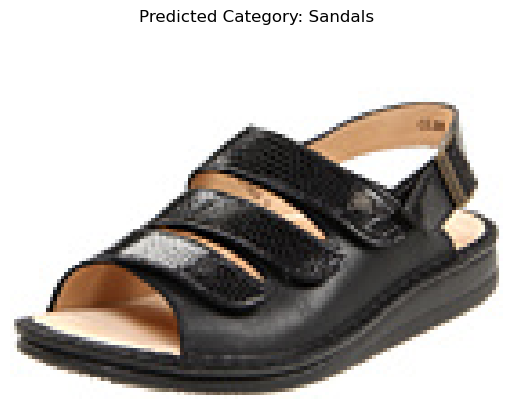

In [44]:
# Example usage1 for a sandal image
image_path = "E:\\CNN\\ShoeClassification\\test\\image (1).jpg"
display_image_with_label(image_path, model)

1/1 [==============================] - 0s 50ms/step


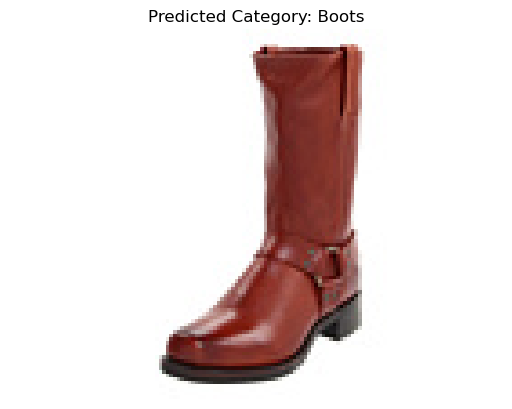

In [45]:
# Example usage2 for a boot image
image_path = "E:\\CNN\\ShoeClassification\\test\\image (2).jpg"
display_image_with_label(image_path, model)

1/1 [==============================] - 0s 68ms/step


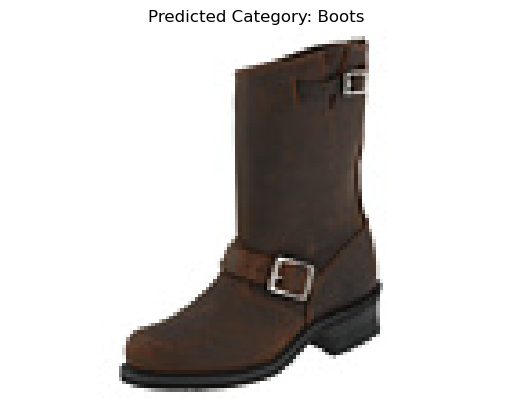

In [46]:
# Example usage3 for a boot image
image_path = "E:\\CNN\\ShoeClassification\\test\\image (3).jpg"
display_image_with_label(image_path, model)

1/1 [==============================] - 0s 50ms/step


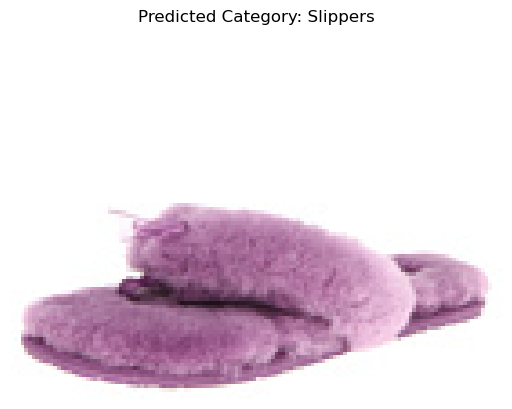

In [47]:
# Example usage4 for a slipper image
image_path = "E:\\CNN\\ShoeClassification\\test\\image (89).jpg"
display_image_with_label(image_path, model)

# Save the Model

In [48]:
#to save the model
model.save("shoesclassification.h5") 

In [49]:
#to load the model
# from keras.models import load_model
# var = load_model("shoesclassification.h5")
# var.predict(x_test)

# Thank you!!
- Aabshaar Shaikh